# Linear Regression

## 1 - Description

Linear regression on $p$ variables focusses on fitting a straight line in $p$-dimensions that passes as close as possible to the data points in order to reduce error.

- A supervised learning technique
- Useful for predicting a quantitative response
- Linear Regression attempts to fit a function to predict a response variable
    - The problem is reduced to a paramteric problem of finding a set of parameters
    - The function is limited to having a straight line form

## 2- Advertising Dataset

The Advertising dataset is obtained from http://www-bcf.usc.edu/~gareth/ISL/data.html and contains 200 datapoints of sales of a particular product, and TV, newspaper and radio advertising budgets (all figures are in units of $1,000s).

In [3]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy.random import RandomState
import math
%matplotlib inline

In [4]:
# Import Advertising dataset (http://www-bcf.usc.edu/~gareth/ISL/data.html)
advert = pd.read_csv("Advertising.csv").iloc[:,1:]

In [5]:
print("Number of observations (n) =",advert.shape[0])
print("Number of predictor variables (p) =",advert.shape[1]-1)
print()
print("Advertising.csv")
advert.head()

Number of observations (n) = 200
Number of predictor variables (p) = 3

Advertising.csv


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The response variable is "sales". The predictor variables are "TV", "radio" and "newspaper".

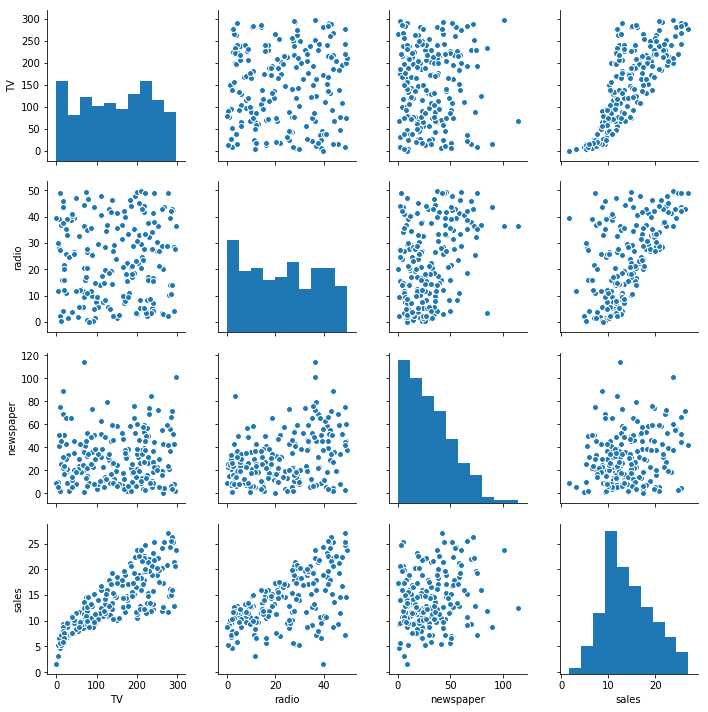

In [6]:
sns.pairplot(data=advert)

By looking at a pairplot to see the simple relationships between the variables, we see a strong positive correlation between sales and TV. A similar relationship between sales and radio is also observed. Newspaper and radio seem to have a slight positive correlation also. We can see this in the correlation matrix below.

In [7]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## 3- Linear Regression

The idea behind Linear Regression is that we reduce the problem of estimating the response variable, $Y$ = sales, by assuming there is a linear function of the predictor variables, $X_1$ = TV, $X_2$ = radio and $X_3$ = newspaper which describes $Y$. This reduces the problem to that of solving for the parameters $\beta_0$, $\beta_1$, $\beta_2$ and $\beta_3$ in the equation:

$$Y \approx \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$$

where $\epsilon$ is the error term. After approximating the coefficients $\beta_i$ as $\hat{\beta}_i$, we obtain an approximation, $\hat{Y}$ of $Y$. The coefficients $\hat{\beta}_i$ are obtained using the observed realisations of the random variables $X_i$. Namely, $X_i = (x_{1i},x_{2i},x_{3i},...,x_{ni})$ are n observations of $X_i$ where $i = 1,2,...,p$. 

We first limit the problem to $p=1$. For example, we are looking to estimate the coefficients in the equation

$$Y \approx \beta_0 + \beta_1 X_1 + \epsilon$$

using the $n$ data points $(x_{11},y_{11}),(x_{21},y_{21}),...,(x_{n1},y_{n1})$. We can define the prediction discrepency of a particular prediction as the difference between the observed value and the predicted value. This is representated in mathematical notation for observation $i$ as $y_i - \hat{y}_i$. Letting $\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1$ we have $y_i - \hat{y}_i = \epsilon_i$. i.e. the error in the prediction of point observation $i$.

In summary, we are looking for a straight line to fit to the following data points as well as possible:

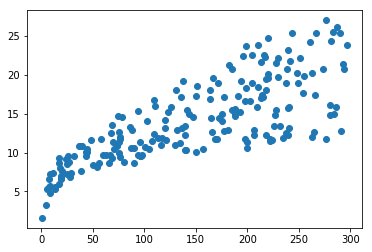

In [8]:
plt.scatter(data=advert, x='TV', y='sales')

#plt.plot([advert['TV'].min(),advert['TV'].max()], [advert['sales'].min(),advert['sales'].max()], 'k-')

In order to calculate appropriate values for parameters $\beta_i$, we would need a method of defining what it means for a line to be a good fit. A popular method is "Ordinary Least Squares". This method relies on minimising the Residual Sum of Squared errors (RSS). i.e. we are looking to minimise $RSS = \sum_{i=1}^n \epsilon_i^2$.

For the 1-parameter case we have that (the semi-colon below means the value of the parameters given the data we have observed) 

$$RSS(\hat{\beta}_0,\hat{\beta}_1;X) = \sum_{i=1}^n \epsilon_i^2 = \sum_{i=1}^n (y_i-\hat{\beta}_0 - \hat{\beta}_1 x_i)^2$$

We would like to find the parameters $(\beta_0,\beta_1)$ which minimise RSS. We first find the partial derivates:

$$\frac{\partial RSS}{\partial \hat{\beta_0}} = -2 [ \sum_{i=1}^n y_i - \sum_{i=1}^n \hat{\beta}_0 - \sum_{i=1}^n \hat{\beta}_1 x_i]$$

$$\frac{\partial RSS}{\partial \hat{\beta_1}} = -2 [ \sum_{i=1}^n y_i x_i - \sum_{i=1}^n \hat{\beta}_0 x_i - \sum_{i=1}^n \hat{\beta}_1 x_i^2]$$

Then

$$\frac{\partial RSS}{\partial \hat{\beta_0}} = 0 \implies  \hat{\beta}_0 = \frac{\sum_{i=1}^n y_i - \hat{\beta}_1 \sum_{i=1}^n y_i}{n} = \frac{n \bar{y} - \hat{\beta}_1 n \bar{x}}{n} = \bar{y} - \hat{\beta}_1 \bar{x}$$

$$\frac{\partial RSS}{\partial \hat{\beta_1}} = 0 \implies  \sum_{i=1}^n y_i x_i - \hat{\beta}_0 \sum_{i=1}^n x_i - \hat{\beta}_1 \sum_{i=1}^n x_i^2 = 0 \implies \hat{\beta}_1 = \frac{n \bar{y} \bar{x} - \sum_{i=1}^n y_i x_i}{n \bar{x}^2 - \sum_{i=1}^n x_i^2} = \frac{\sum_{i=1}^n y_i x_i - n \bar{y} \bar{x}}{\sum_{i=1}^n x_i^2 - n \bar{x}^2} = \frac{\sum_{i=1}^n y_i x_i - n \bar{y} \bar{x} - n \bar{y} \bar{x} + n\bar{y} \bar{x}}{\sum_{i=1}^n x_i^2 - n \bar{x}^2 -n\bar{x}^2 + n\bar{x}^2} = \frac{\sum_{i=1}^n x_i y_i - \sum_{i=1}^n y_i \bar{x} - \sum_{i=1}^n x_i \bar{y}  + \sum_{i=1}^n \bar{y} \bar{x}}{\sum_{i=1}^n x_i^2 - \sum_{i=1}^n x_i \bar{x} - \sum_{i=1}^n x_i \bar{x} + \sum_{i=1}^n \bar{x}^2}$$

Where, in the penultimate line we completed the square and in the last equality we used the equality $n\bar{y} \bar{x} = \sum_{i=1}^n y_i \bar{x} = \sum_{i=1}^n x_i \bar{y}$ and $n\bar{x}^2 = n\bar{x} \bar{x} = \sum_{i=1}^n x_i \bar{x}$. Factorising

$$\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

In the above, we have used the fact that $\hat{\mu} = \bar{x} = \frac{1}{n} \sum_{i=1}^n$ is an unbiased *Maximum Likelihood Estimator* (MLE) for the population mean $\mu$ (see Appendix).

We have now found the values of $(\hat{\beta}_0,\hat{\beta}_1)$ which corresponds to the extrema of RSS. We will still need to show that this is indeed a minima.

From Calculus, we know that if $\frac{\partial^2 RSS}{\partial \hat{\beta}_0 ^2} \frac{\partial^2 RSS}{\partial \hat{\beta}_1 ^2} - (\frac{\partial^2 RSS}{\partial \hat{\beta}_0 \partial \hat{\beta}_1})^2 > 0$, this is an extrema and not an inflexion point. Additionally, if $\frac{\partial^2 RSS}{\partial \hat{\beta}_0 ^2} > 0$ and $\frac{\partial^2 RSS}{\partial \hat{\beta}_1 ^2} > 0$ this is a minima.

We have that

$$\frac{\partial^2 RSS}{\partial \hat{\beta}_0 ^2} = 2n > 0$$
$$\frac{\partial^2 RSS}{\partial \hat{\beta}_1 ^2} = 2 \sum_{i=1}^n x_i^2 > 0$$
$$\frac{\partial^2 RSS}{\partial \hat{\beta}_0 \partial \hat{\beta}_1} = 2 \sum_{i=1}^n x_i$$

So,

$\frac{\partial^2 RSS}{\partial \hat{\beta}_0 ^2} \frac{\partial^2 RSS}{\partial \hat{\beta}_1 ^2} - (\frac{\partial^2 RSS}{\partial \hat{\beta}_0 \partial \hat{\beta}_1})^2 = (2n) (2 \sum_{i=1}^n x_i^2) - (2 \sum_{i=1}^n x_i)^2 > 0 \; \forall \; n>1$ (see Appendix)

This means that this is indeed a minima (since we have satisfied the conditions stated above). 

The equation

$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1$$

then defines a straight line of best fit which minimises the expected value of the errors (residuals). From the form of this line, we can see that $\hat{\beta}_0$ corresponds to the value of $\hat{Y}$ if the independent variable $X_1$ is zero. $\hat{\beta}_1$ is then the gradient. 

In the following we construct 3 functions dependent on a single independent variable and attach an error term and calculate the best fit. The three functions are chosen as:

1- $f_1(x) = 4.67 + 5.07*x$

2- $f_2(x) = 4.67 + 5.07*x^2$

3- $f_3(x) = 4.67 + 5.07*sin(x)$

In [9]:
#f_1(x)=4.67+5.07∗x
def f_1(x):
    return 4.67 + 5.07*x

#f_2(x)=4.67+5.07∗x2
def f_2(x):
    return 4.67 + 5.07*x**2

#f_3(x)=4.67+5.07∗sin(x)
def f_3(x):
    return 4.67 + 5.07*math.sin(x)

In [10]:
r = np.random.RandomState(101)
X = 100*r.rand(1000)

#Error term with sigma = 10, mu = 0
E_1 = 10*r.randn(1000)

#Error term with sigma = 500, mu = 0
E_2 = 500*r.randn(1000)

#Error term with sigma = 19, mu = 0
E_3 = 19*r.randn(1000)

#Response variables
Y_1 = list(map(f_1,X))+E_1
Y_2 = list(map(f_2,X))+E_2
Y_3 = list(map(f_3,X))+E_3

First case 1- f_1

Text(0,0.5,'f_1(x)')

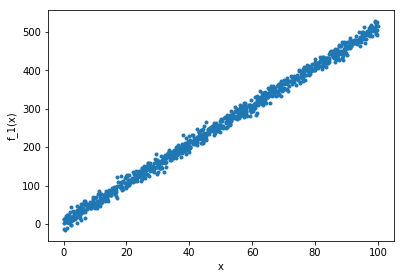

In [11]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(X,Y_1,'.')
axes.set_xlabel('x')
axes.set_ylabel('f_1(x)')

Fit the model $\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1$ to the data. We know that 

$$\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

and

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

In [12]:
#Find the mean of the data for f_1
x_bar1 = np.mean(X)
y_bar1 = np.mean(Y_1)

numerator = 0
denominator = 0

for i in range(len(Y_1)):
    numerator += (X[i] - x_bar1)*(Y_1[i] - y_bar1)
    denominator += (X[i] - x_bar1)**2
    
beta_1 = numerator/denominator
beta_0 = y_bar1 - beta_1*x_bar1

print('Y = {beta_0} + {beta_1} * X'.format(beta_0 = beta_0, beta_1 = beta_1))

Y = 5.50124312485292 + 5.064254524922961 * X


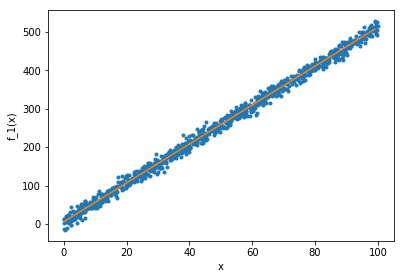

In [13]:
x = np.linspace(0,99,1000) # 1000 linearly spaced numbers
y = beta_0 + beta_1 * x

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(X,Y_1,'.')
axes.set_xlabel('x')
axes.set_ylabel('f_1(x)')
axes.plot(x,y)

Let's see what the residuals look like by plotting them

This is roughly a normal distribution with mean -1.2157386208855315e-14 and 10.08588495757817


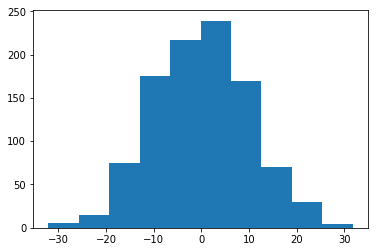

In [14]:
y_fitted = beta_0 + beta_1 * X
Res_1 = y_fitted - Y_1

plt.hist(Res_1)

print('This is roughly a normal distribution with mean {mean} and {std}'.format(mean=np.mean(Res_1),std=np.std(Res_1)))

Since the residuals are roughly normally distributed, our model may be a good choice. Now let's do the same for f_2.

Text(0,0.5,'f_2(x)')

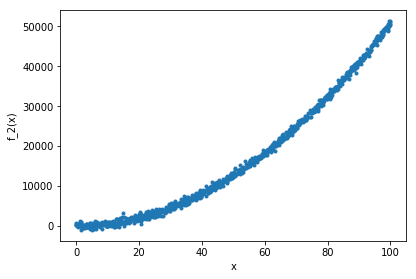

In [15]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(X,Y_2,'.')
axes.set_xlabel('x')
axes.set_ylabel('f_2(x)')

In [16]:
#Find the mean of the data for f_1
x_bar2 = np.mean(X)
y_bar2 = np.mean(Y_2)

numerator = 0
denominator = 0

for i in range(len(Y_2)):
    numerator += (X[i] - x_bar2)*(Y_2[i] - y_bar2)
    denominator += (X[i] - x_bar2)**2
    
beta_1 = numerator/denominator
beta_0 = y_bar2 - beta_1*x_bar2

print('Y = {beta_0} + {beta_1} * X'.format(beta_0 = beta_0, beta_1 = beta_1))

Y = -8445.98030682202 + 506.16066894401735 * X


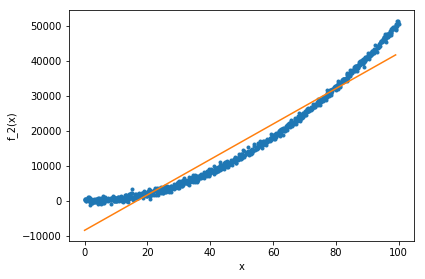

In [17]:
x = np.linspace(0,99,1000) # 1000 linearly spaced numbers
y = beta_0 + beta_1 * x

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(X,Y_2,'.')
axes.set_xlabel('x')
axes.set_ylabel('f_2(x)')
axes.plot(x,y)

The residuals are certainly not from a normal distribution


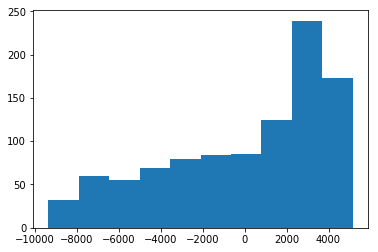

In [18]:
y_fitted = beta_0 + beta_1 * X
Res_2 = y_fitted - Y_2

plt.hist(Res_2)

print('The residuals are certainly not from a normal distribution')

So let's try $X^2$ as a parameter instead of $X$ in our linear model.

In [19]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()
lm.fit(X.reshape(-1,1),Y_1.reshape(-1,1))
print('beta_0 = {}'.format(lm.intercept_))
print('beta_1 = {}'.format(lm.coef_))

beta_0 = [5.50124312]
beta_1 = [[5.06425452]]


## Appendix

### A1 - $(2n) (2 \sum_{i=1}^n x_i^2) - (2 \sum_{i=1}^n x_i)^2 > 0$

Statement: $(2n) (2 \sum_{i=1}^n x_i^2) - (2 \sum_{i=1}^n x_i)^2 > 0 \; \forall \; n > 1$

Proof: We prove this by induction on $n$. If n = 1, we have $(2n) (2 \sum_{i=1}^n x_i^2) - (2 \sum_{i=1}^n x_i)^2 = 0$, but this is not what we want.

Let n = 2 > 1. Then 

$$(2n) (2 \sum_{i=1}^n x_i^2) - (2 \sum_{i=1}^n x_i)^2 = 2 x_1^2 + 2 x_2^2 - (x_1 + x_2)^2 = 2 x_1^2 + 2 x_2^2 - x_1^2 - x_2^2 - 2x_1 x_2 = x_1^2 + x_2^2 - 2x_1 x_2 = (x_1 - x_2)^2  > 0$$

So we have proved the assertion for n = 2.

Let us prove the statement for n+1 assuming it is true for n.

i.e. Assume $n \sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2 > 0$

Then 

$$(n+1) \sum_{i=1}^{n+1} x_i^2 - (\sum_{i=1}^{n+1} x_i)^2 = (n+1)[\sum_{i=1}^{n} x_i^2 + x_{n+1}^2] - (\sum_{i=1}^{n} x_i + x_{n+1})^2 = [n \sum_{i=1}^n x_i^2 + \sum_{i=1}^n x_i^2 + (n+1)x_{n+1}^2] - (\sum_{i=1}^n x_i)^2 - x_{n+1}^2 + 2x_{n+1} \sum_{i=1}^n x_i$$

$$= n \sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2 + \sum_{i=1}^n x_i^2 + (n+1)x_{n+1}^2 - x_{n+1}^2 + 2x_{n+1} \sum_{i=1}^n x_i$$

by the assumption for n we have

$$> \sum_{i=1}^n x_i^2 + (n+1)x_{n+1}^2 - x_{n+1}^2 + 2x_{n+1} \sum_{i=1}^n x_i$$

by the assumption for n that $\sum_{i=1}^n x_i^2 > \frac{1}{n}(\sum_{i=1}^n x_i)^2$ we have

$$> \frac{1}{n}(\sum_{i=1}^n x_i)^2 + (n+1)x_{n+1}^2 - x_{n+1}^2 + 2x_{n+1} \sum_{i=1}^n x_i = \frac{1}{n}(\sum_{i=1}^n x_i)^2 + nx_{n+1}^2 + 2x_{n+1} \sum_{i=1}^n x_i = \frac{1}{n}[(\sum_{i=1}^n x_i)^2 + n^2 x_{n+1}^2 + 2n x_{n+1} \sum_{i=1}^n x_i]$$

$$=\frac{1}{n}[(\sum_{i=1}^n x_i)^2 + n^2 x_{n+1}^2 + 2n x_{n+1} \sum_{i=1}^n x_i]=\frac{1}{n}[(\sum_{i=1}^n x_i + n x_{n+1})^2] > 0$$